# Question 1

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [272]:
df = sns.load_dataset('iris')
x = df.drop('species', axis=1)
y = df['species']

In [273]:
le = LabelEncoder()
y = le.fit_transform(y)

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [275]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [276]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [277]:
variance_ratios = pca.explained_variance_ratio_
print('explained variance ratio for each component: ')
print(variance_ratios)

explained variance ratio for each component: 
[0.72144248 0.23667637]


# Question 2

In [278]:
for components in [1, 2, 3]:
    pca = PCA(n_components=components)
    principal_components = pca.fit_transform(x)
    cumulative_variance = sum(pca.explained_variance_ratio_)
    print(f"Number of components: {n_components}, Cumulative Explained Variance: {cumulative_variance:.3f}")

Number of components: 3, Cumulative Explained Variance: 0.925
Number of components: 3, Cumulative Explained Variance: 0.978
Number of components: 3, Cumulative Explained Variance: 0.995


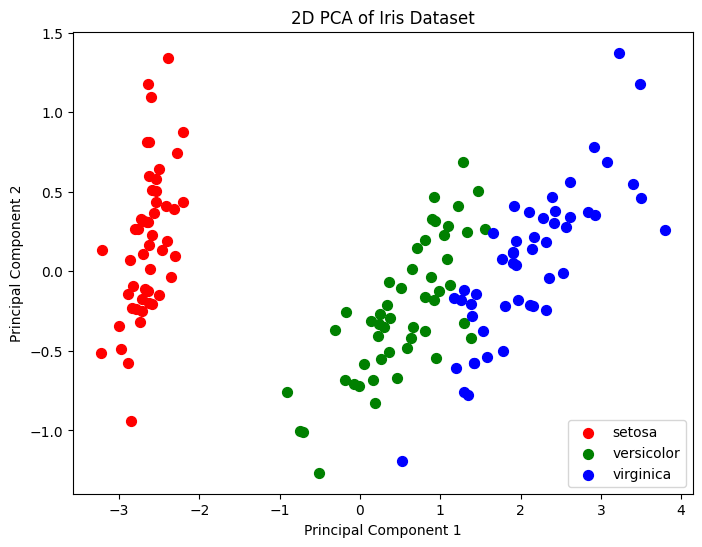

In [279]:
x = iris['data']
y = iris['target']

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

plt.figure(figsize=(8, 6))
targets = list(iris.target_names)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = (y == targets.index(target))
    plt.scatter(
    principal_components[indices_to_keep, 0],
    principal_components[indices_to_keep, 1],
    c=color,
    s=50,
    label=target
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('2D PCA of Iris Dataset')
plt.show()

## Question 1
### Which of the following are the benefits of dimensionality
### reduction?
### A. Data Visualization
### B. Faster training time for statistical algorithms
### C. All of the above
### D. None of the above
### ------------------------------------------------------------
### the answer is C. All of the above
### ------------------------------------------------------------


## Question 2
### In PCA, dimensionality reduction depends upon the:
### A. Feature set only
### B. Label set only
### C. Both features and labels sets
### D. None of the above
### ------------------------------------------------------------
### the answer is D. None of the above
### ------------------------------------------------------------

## Question 3

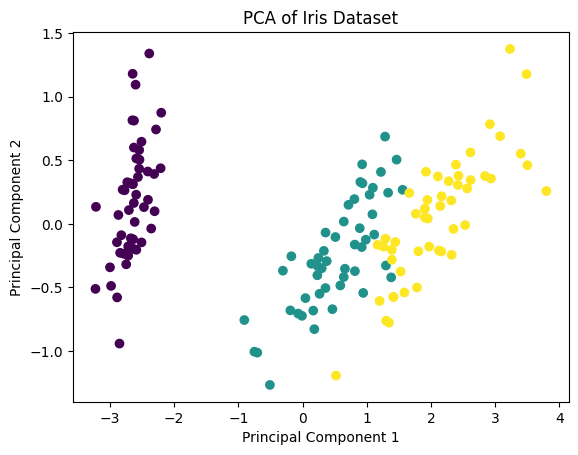

In [280]:
pca = PCA(2)
x_pca = pca.fit_transform(x)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Question 4

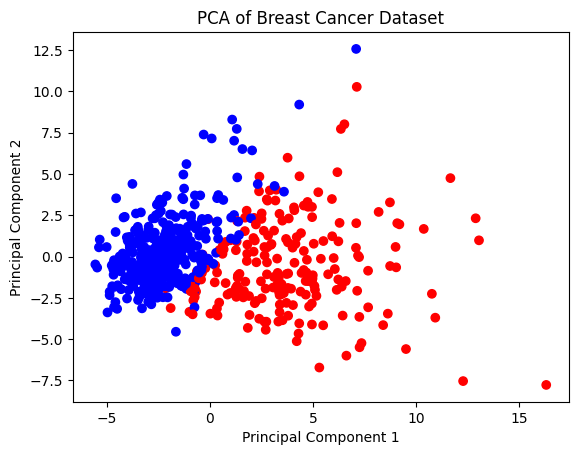

In [281]:
data = load_breast_cancer()
target_names = {
    0: 'maliganant',
    1: 'benign'
}

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df['target_names'] = df['target'].map(target_names)

x = df.drop(['target', 'target_names'], axis=1)
y = df['target_names']

x_standardized = StandardScaler().fit_transform(x)

pca = PCA(2)
principal_components = pca.fit_transform(x_standardized)

color_mapping = {'maliganant': 'red', 'benign': 'blue'}
colors = y.map(color_mapping)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### subtask 2:

In [282]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
target_names               0
dtype: int64

In [283]:
# there is no null vaulues to handle

### subtask 3:

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

### subtask 4:

In [285]:
sc = StandardScaler()
standered_train = sc.fit_transform(x_train)
standared_test = sc.fit_transform(x_test)

### subtask 5:

In [286]:
pca = PCA(30)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

### subtask 6:

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)

RandomForestClassifier()

### subtask 7:

In [293]:
predictions = rfc.predict(x_test)

print(accuracy_score(y_test, predictions))

0.42657342657342656


C:\Users\MANAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### subtask 8:

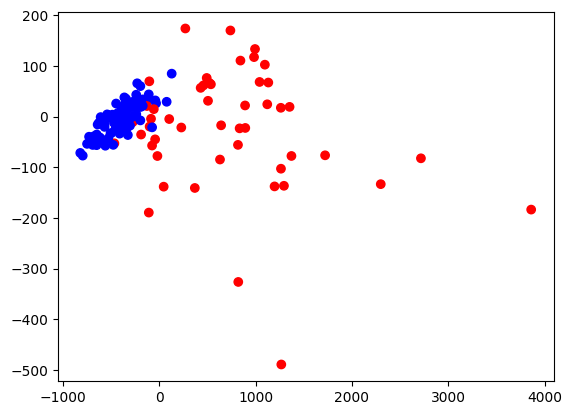

In [311]:
color_mapping = {'maliganant': 'red', 'benign': 'blue'}
colors = y_test.map(color_mapping)

plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=colors)